In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Makes sure the random numbers are the same each time the 
# program runs
np.random.seed(1)

def generateRawData(nrows, ncolumns, distance, distribution):
    if distribution == "uniform":
        
        # The first points will always be between 0 and 1
        a = 0
        b = 1
        
        # Second set of points is a either 0 or 1, the distance between points,
        # and 1 added together
        c = a + distance 
        d = b + distance 

        # Create two separate dataframes that fit in two different 
        # ranges on a uniform distribution
        df1 = pd.DataFrame(np.random.uniform(a, b, (int(nrows / 2), ncolumns)))
        df1['labels'] = 0
        df2 = pd.DataFrame(np.random.uniform(c, d, (int(nrows/2), ncolumns)))
        df2['labels'] = 1
        
        # Concatenate the data frames and mix the rows together
        df = pd.concat([df1, df2])
        perm = np.random.permutation(df)
        
        # Turn the permutated data back into a dataframe for use
        dfreal = pd.DataFrame(perm)
        
        # Save the dataframe to a text file if others want to use
        # np.savetxt('synthetic_data_with_labels.txt', dfreal)
        
        fig, ax = plt.subplots()
        plt.scatter(df[0], df[1])
        plt.title("Random Uniform Distribution")
        plt.show()
        
        return dfreal
    else:
        # Creates first Gaussian distribution
        label1 = pd.DataFrame(np.random.normal(5 + distance, 1, size=(int(nrows/2), ncolumns)))
        # Adds new column for label
        label1['label'] = 0
        
        
        # Creates second Gaussian distribution
        label2 = pd.DataFrame(np.random.normal(5, 1, size=(int(nrows/2), ncolumns)))
        # Adds new column for label
        label2['label'] = 1
        
        # Combines both Gaussian distributions
        df = pd.concat([label1, label2])
        
        
        # Shuffles Gaussian distributions
        shuffled_df = pd.DataFrame(np.random.permutation(df))
            
        # Creates historgram of Gaussian distributions
        plt.scatter(shuffled_df[0], shuffled_df[1])
        plt.title("Random Gaussian Distribution")
        plt.show()
        
        # Saves generated Gaussian distribution in same folder as file
        # np.savetxt("Generated Gaussian Distribution.txt", shuffled_df)
        
        return shuffled_df

# raw_uniform = generateRawData(500, 150, 2, "uniform")
# raw_gaussian = generateRawData(500, 150, 2, "gaussian")

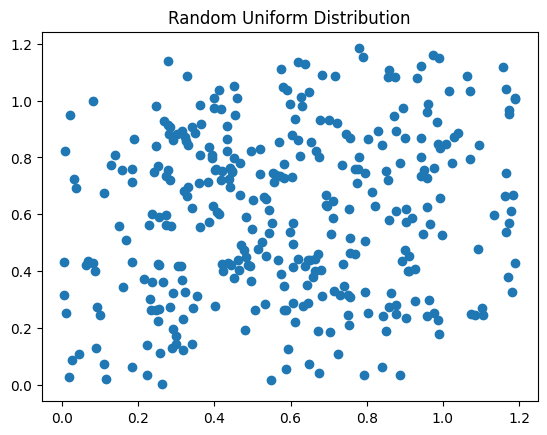

In [6]:
uniform1 = generateRawData(343, 24, 0.2, "uniform")
uniform1
uniform1.iloc[:,-1].value_counts()
#np.savetxt("uniform_small.csv", uniform1, delimiter=',')

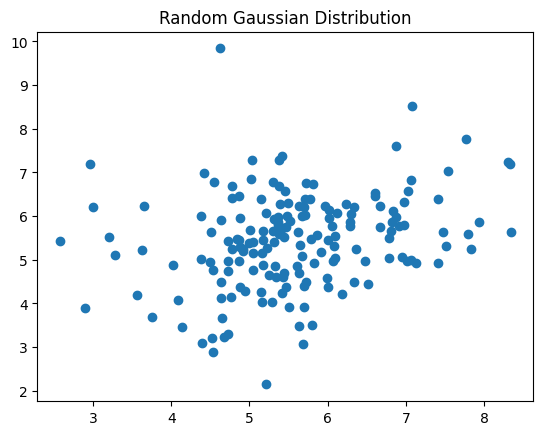

12
0.0    86
1.0    86
Name: count, dtype: int64
<bound method DataFrame.info of            0         1         2         3         4         5         6   \
0    5.446497  5.524645  9.551270  5.067381  4.562901  5.487828  6.548404   
1    6.005703  4.378494  4.007741  5.625640  5.026815  6.955814  5.788400   
2    7.467576  5.636016  6.009095  5.454702  4.938890  5.516838  4.984778   
3    5.676460  6.008813  3.219839  6.384320  5.581591  5.015414  4.246057   
4    5.862150  5.570538  4.744780  4.154926  6.130226  5.144358  5.451861   
..        ...       ...       ...       ...       ...       ...       ...   
167  5.421517  7.382138  7.406946  3.810145  7.213129  5.564395  7.965578   
168  5.388714  6.271485  4.798146  2.694937  5.104381  3.297511  5.625400   
169  7.015191  4.977847  6.525299  4.171601  5.840464  6.264536  6.035043   
170  5.627598  6.238486  5.194341  3.611143  6.108360  5.985651  3.742878   
171  5.519444  5.886098  5.695109  6.725462  4.786590  4.617610  5.48828

In [8]:
gaussian = generateRawData(172, 12, 1, "gaussian")
gaussian
print(gaussian.iloc[:,-1].value_counts())
np.savetxt("gaussian_small.csv", gaussian, delimiter=',')
#print(gaussian.info)